## Mexico's COVID19 Data description and Analisys

> 
> 
<font size=5 color='black'>Data comes from:</font>
<a  href="https://coronavirus.gob.mx/datos/#DownZCSV"><font size=5 color='blue'>Updated Every 24hrs</font></a>
> 
>
<div class="container" style="position: relative;text-align: center,border:2px solid red;
  color: white;">
  <img align="left" src="https://i.imgur.com/9hAvQVf.png">
</div>

<font size=5 color='black'>The name of each file changes every day</font>
>
<font size=5 color='black'> <a href="https://coronavirus.gob.mx/datos/#DownZCSV">https://coronavirus.gob.mx/datos/#DownZCSV</a> </font>
>
<img align="left" src="https://i.imgur.com/ohUy6u0.png">
<br>
<br>
<font size=5 color='black'>'200XXXCOVID19MEXICO.csv' comes from the link:</font>
<br>
<font size=5 color='black'> Todos los datos (DGE)</font>


# Loading data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
# Pacient data contains detail information about every subject in the database, age, sex, and some illness history
pacient_data = pd.read_csv('200514COVID19MEXICO.csv', encoding='ANSI')
# Confirmed is the number of comfirmed cases each day
confirmed = pd.read_csv('Casos_Diarios_Estado_Nacional_Confirmados_20200514.csv', encoding='ANSI')
# Suspicious is the number of suspicious cases each day
suspicious = pd.read_csv('Casos_Diarios_Estado_Nacional_Sospechosos_20200514.csv', encoding='ANSI')
# Negatives is the number of negative test cases each day
negatives = pd.read_csv('Casos_Diarios_Estado_Nacional_Negativos_20200514.csv', encoding='ANSI')
# Deaths is the number of deceased cases each day
deaths = pd.read_csv('Casos_Diarios_Estado_Nacional_Defunciones_20200514.csv', encoding='ANSI')
# State_names is an array with the names of each state
state_names = deaths.nombre.values

In [7]:
# Data example
confirmed.head()

,cve_ent,poblacion,nombre,07-01-2020,08-01-2020,09-01-2020,10-01-2020,11-01-2020,12-01-2020,13-01-2020,...,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020,10-05-2020,11-05-2020,12-05-2020,13-05-2020,14-05-2020
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,9,15,20,13,0,4,7,1,0,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,78,75,79,83,33,27,40,16,2,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,11,10,7,4,6,5,3,6,0,0
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,9,15,11,11,11,5,17,9,0,0
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,26,32,30,32,22,15,26,24,0,0


## State Names

In [8]:
state_names

array(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR',
       'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA', 'DISTRITO FEDERAL', 'COAHUILA',
       'COLIMA', 'DURANGO', 'GUANAJUATO', 'GUERRERO', 'HIDALGO',
       'JALISCO', 'MEXICO', 'MICHOACAN', 'MORELOS', 'NAYARIT',
       'NUEVO LEON', 'OAXACA', 'PUEBLA', 'QUERETARO', 'QUINTANA ROO',
       'SAN LUIS POTOSI', 'SINALOA', 'SONORA', 'TABASCO', 'TAMAULIPAS',
       'TLAXCALA', 'VERACRUZ', 'YUCATAN', 'ZACATECAS', 'Nacional'],
      dtype=object)

# 1.- Descriptive data

## Functions to get discrete or cummulative data from any particular state

In [9]:
# Name is the name of the state
# raw_data is the type of data: deaths, confirmed, negatives or suspicious

def get_discrete(name,raw_data):
    return raw_data.loc[raw_data['nombre'] == name]

def get_cummulative(name,raw_data):
    cummulative = []
    raw = raw_data.loc[raw_data['nombre'] == name]
    
    for i in raw.values[0][3:]:
        if len(cummulative) == 0:
            cummulative.append(i)
        else:
            cummulative.append(i+cummulative[-1])
    return cummulative

In [10]:
discrete_cdmx_deaths = get_discrete('DISTRITO FEDERAL',deaths)
cummulative_cdmx_deaths = get_cummulative('DISTRITO FEDERAL',deaths)

## get_discrete() gives a pd.Series with the dates for columns

In [11]:
discrete_cdmx_deaths.head()

,cve_ent,poblacion,nombre,17-03-2020,18-03-2020,19-03-2020,20-03-2020,21-03-2020,22-03-2020,23-03-2020,...,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020,10-05-2020,11-05-2020,12-05-2020,13-05-2020,14-05-2020
6,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,1,1,...,38,31,22,22,32,27,20,16,4,0


## get_cummulative() gives an array of the cummulative record 

In [12]:
cummulative_cdmx_deaths[:10]

[0, 0, 0, 0, 0, 1, 2, 2, 3, 6]

## Function to get several states sorted from max to min.

In [13]:
# It returns an array with data for each state and an array of names
# [data1,data2,data3...],['name1','name2','name3'...] = get_max_to_min()
# It is used for plotting all data at once

# N is the number of states returned, if None will return all states
# Could ask for discrete or cummulative if discrete parameter == False
# National data is naturally much more higher that any particular state, by default is ommited
# To include it set the parameter include_national to True

def get_max_to_min(raw_data,n=None,discrete=True,include_national=False):
    
    
    dic = {}
    if include_national:
        names = raw_data.nombre
    else:
        names = [x for x in raw_data.nombre if x != 'Nacional']

    for i in names:
        
        if discrete:
            result = get_discrete(i,raw_data).values[0][3:].sum()
        else:
            result = get_cummulative(i,raw_data)[-1]
        
        if result in dic.keys():
            dic[result+0.1] = i
        else:
            dic[result] = i

    dic_sort = sorted(dic.keys(),reverse=True)
    sorted_names = [dic[x] for x in dic_sort][:n]
    
    if discrete:
        return [get_discrete(x,raw_data) for x in sorted_names], sorted_names
    else:
        return [get_cummulative(x,raw_data) for x in sorted_names], sorted_names


## Function to plot discrete data

In [14]:
# Data should be an array (even if there is only one state) with discrete data from get_discrete()
# Names also should be an array of strings
# You can choose the colors of each state by passing an array: ['r','b','y'...]
# Or passing a string: 'rgy' if each of the colors are one letter.
# If colors = None or is not passed, colors will be a cycle from 'b', 'g', 'r', 'c', 'm' and 'y'
# Size of the ploot coul be modified by: plt.rcParams["figure.figsize"] = (15,6) inside the function

def plot_discrete(data, names ='no_name',colors=None, title=None):
    plt.close('all')
    plt.style.use('seaborn-whitegrid')

    plt.rcParams["figure.figsize"] = (15,6)
    
    if colors == None:
            colors ='bgrcmy'* int(np.ceil(len(data)/6))
    
    for ind, i in enumerate(data):
        
        plt.bar(i.columns[3:],i.values[0][3:], label = names[ind],color = colors[ind],alpha = 0.5)
       
    plt.title(title, fontsize=14)
    plt.legend(loc='upper left')
    plt.xticks(rotation=90)
    plt.show()

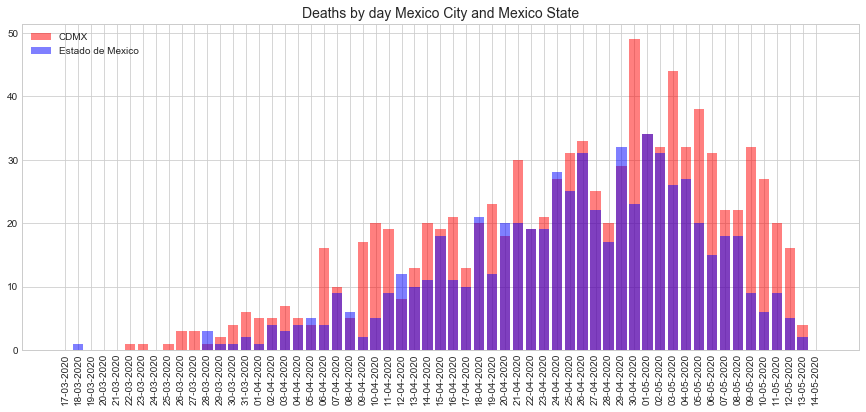

In [15]:
plot_discrete([get_discrete('DISTRITO FEDERAL',deaths),
               get_discrete('MEXICO',deaths)],
               names =['CDMX','Estado de Mexico'],
               colors=['r','b'],
               title='Deaths by day Mexico City and Mexico State')

# Funtion to plot cummulative data

In [16]:
# Same Instructions of the discrete data apply here
# Data and Names should be arrays and etc...

def plot_cummulative(data, names ='no_name',colors=None, title=None):
    plt.close('all')
    plt.style.use('seaborn-whitegrid')

    plt.rcParams["figure.figsize"] = (15,7)
    
    if len(data[0]) == len(deaths.columns[3:]):
        index = deaths.columns[3:]
    elif len(data[0]) == len(confirmed.columns[3:]):
        index = confirmed.columns[3:]
    elif len(data[0]) == len(suspicious.columns[3:]):
        index = suspicious.columns[3:]
    elif len(data[0]) == len(negatives.columns[3:]):
        index = negatives.columns[3:]
    else:
        index = np.arange(0,len(data[0]))
    
    if colors == None:
        colors ='bgrcmy'* int(np.ceil(len(data)/6))
    
    for ind,i in enumerate(data):
        
        plt.plot(index,i,label=names[ind],color=colors[ind])
        plt.scatter(index[-1],i[-1],color=colors[ind])
        plt.text(index[-1], i[-1],str(int(i[-1])) , fontsize=14 ,color=colors[ind])
        plt.fill_between(index, i, color = colors[ind], alpha = 0.4)
        
    plt.xticks(rotation=90)
    plt.title(title, fontsize=14)
    plt.legend(loc='upper left',fontsize=12)
    plt.show()

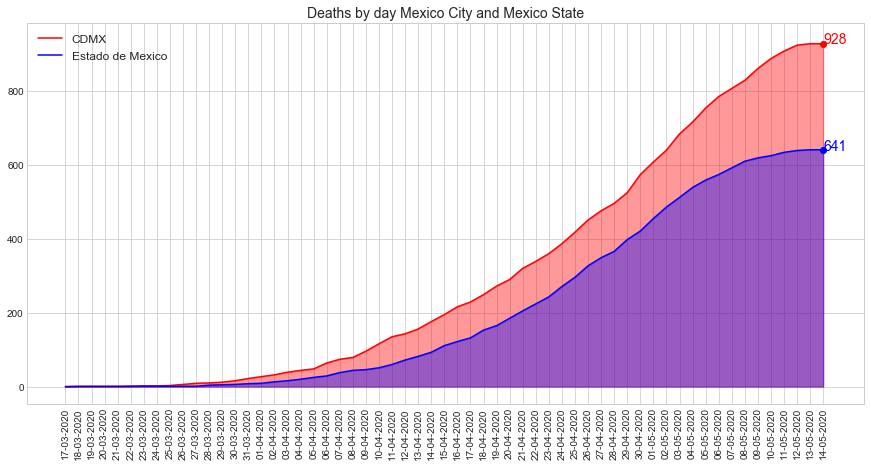

In [17]:
plot_cummulative([get_cummulative('DISTRITO FEDERAL',deaths),
                  get_cummulative('MEXICO',deaths)],
                  names =['CDMX','Estado de Mexico'],
                  colors=['r','b'],
                  title='Deaths by day Mexico City and Mexico State')

# Function to plot all data from max to min

In [18]:
# Raw_data is the database of origin: deaths, confirmed, etc...
# N is the number of states that will be plotted
# If the Discrete parameter is False then cummulative data will be plotted

def plot_all(raw_data,n=None, discrete=True, title='No title',colors = None):
    
    if discrete:
        data, names = get_max_to_min(raw_data,n=n,discrete=True)
        plot_discrete(data = data,
                      names = names,
                      colors = colors,
                      title = title)
    else:
        data, names = get_max_to_min(raw_data,n=n,discrete=False)
        plot_cummulative(data = data,
                         names = names,
                         colors = colors,
                         title = title)

# Discrete states from max to min incidence

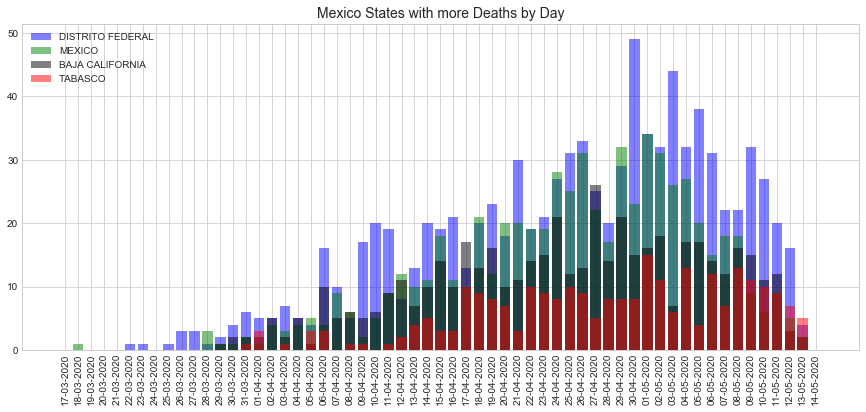

In [19]:
plot_all(raw_data = deaths,
         n=4,
         colors= ['b','g','black','r'],
         discrete=True,
         title='Mexico States with more Deaths by Day')

# Cummulative states from max to min incidence

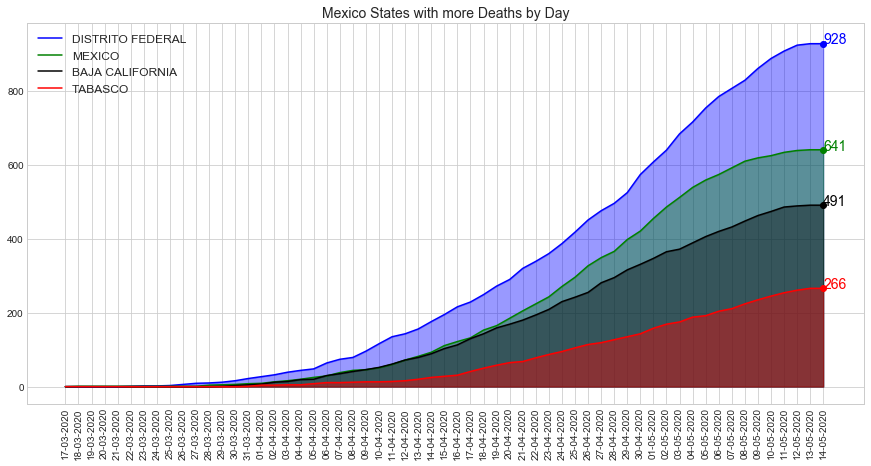

In [20]:
plot_all(raw_data = deaths,
         n=4,
         discrete=False,
         colors= ['b','g','black','r'],
         title='Mexico States with more Deaths by Day')

## Pacients Data